
# **Final Project**

**PLEASE MAKE SURE loan.csv IS UPLOADED TO :'/content/loan.csv'**

**Exploratory Data Analysis (EDA)**
1.   Linear Regression
2.   Logistic Regression
3.   Decision Tree
4.   Random Forest

Part 1:
**Data Set:** loan.csv, which contains loan data and the approval status.
* See below loan.data.info() for detail.
* This section also includes visualization of the data set.

Part 2:
**Linear Regression Model**
*   Predict Loan_Status
*   Predict Loan amount

Part 3:
**Logistic Regression model**
*   Predict Loan_Status
*   Predict Applicant Gender

Part 4:
**Decision Tree**
*   Predict Loan_Status
*   Predict Loan amount

Part 5:
**Random Forest**
*   Predict Loan_Status
*   Predict Loan amount






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


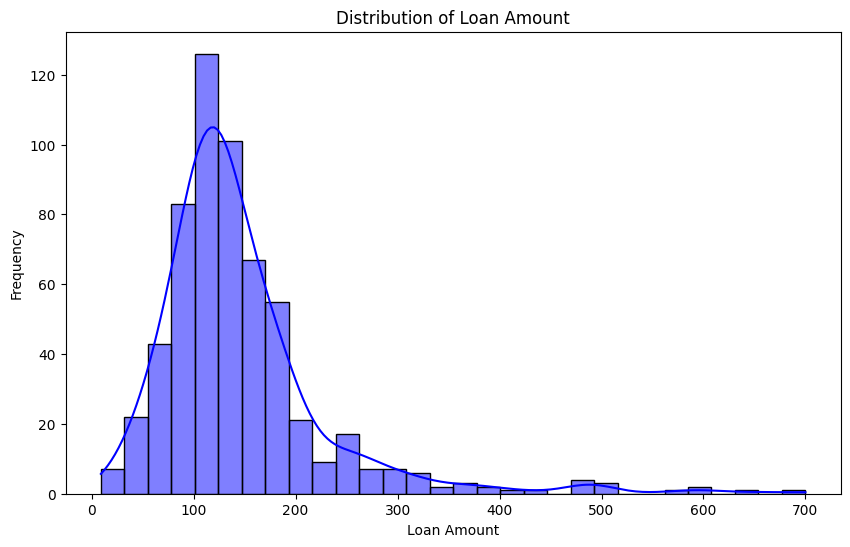

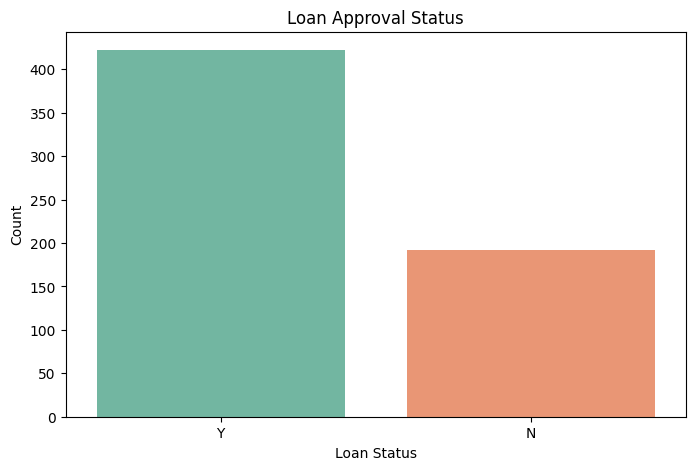

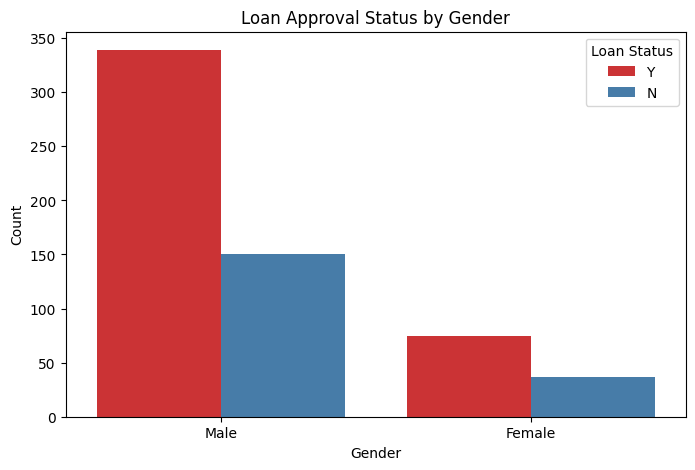

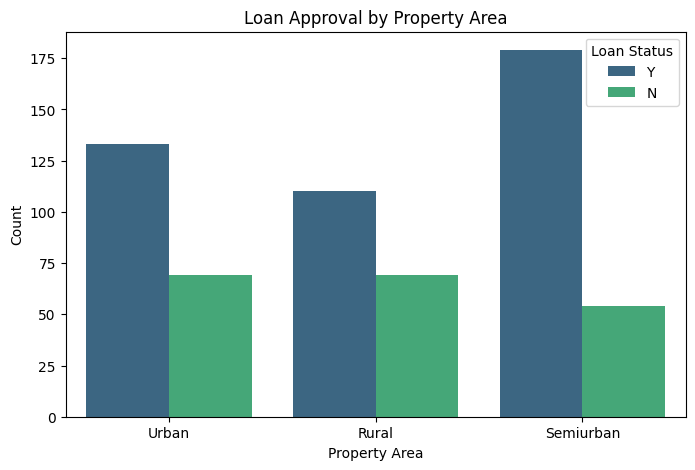

In [ ]:
# Part 1: Data Set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import plotly.express as px
wr.filterwarnings('ignore')
loan_data = pd.read_csv('/content/loan.csv')
loan_data.info()

# Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['LoanAmount'].dropna(), kde=True, bins=30, color='blue')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Loan Status Counts
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=loan_data, palette='Set2')
plt.title("Loan Approval Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Loan Status by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_data, palette='Set1')
plt.title("Loan Approval Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Loan Status by Property areea
plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_data, palette='viridis')
plt.title("Loan Approval by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()



In [ ]:
# Part 2: Linear Regression Model to Predict Loan_Status
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


loan_data = pd.read_csv('/content/loan.csv')

# preprocessing
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})  # encode Loan_Status 1 or 0
loan_data = loan_data.drop(columns=['Loan_ID'])  # drop Loan_ID as it's not predictive factor

# process mill missing values (basic strategy)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode categorical variables
loan_data = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents',
                                               'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# features and target
X = loan_data.drop(columns=['Loan_Status'])
y = loan_data['Loan_Status']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Pridict on test data
y_pred = model.predict(X_test)

# Convert predictions to binary (threshold = 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# output for a sample input from the dataset
sample_input = X_test.iloc[0:1]
predicted_status = model.predict(sample_input)
predicted_status_binary = "Approved" if predicted_status >= 0.5 else "Not Approved"

print(f"\nSample Input: \n{sample_input}")
print(f"\n\n Predicted Loan Status: {predicted_status_binary}")


Mean Squared Error: 0.17
R-squared Score: 0.27
Accuracy: 0.79

Sample Input: 
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
350             9083                0.0       228.0             360.0   

     Credit_History  Gender_Male  Gender_Unknown  Married_Unknown  \
350             1.0         True           False            False   

     Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
350         True         False         False          False   

     Dependents_Unknown  Education_Not Graduate  Self_Employed_Unknown  \
350               False                   False                  False   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
350              False                     True                False  


 Predicted Loan Status: Approved


Mean Squared Error: 2630.81
R-squared Score: 0.52


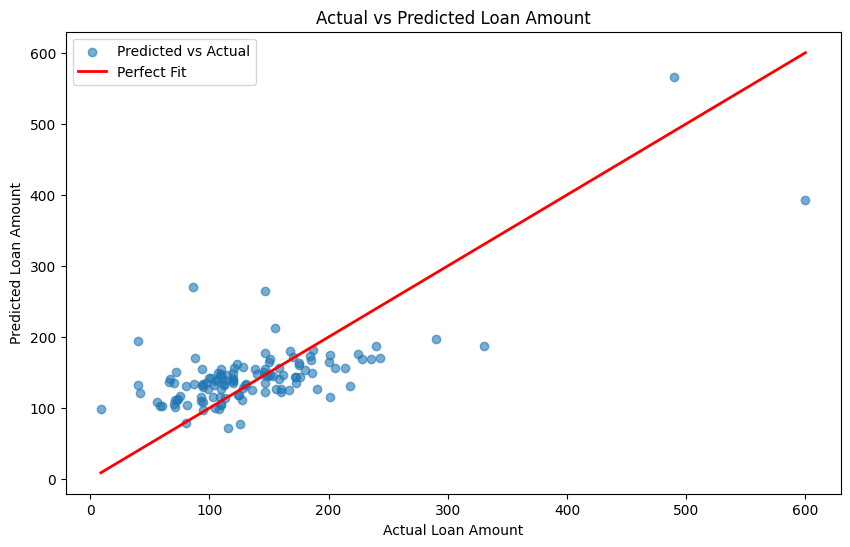


Sample Input: 
     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
350             9083                0.0             360.0             1.0   

     Gender_Male  Gender_Unknown  Married_Unknown  Married_Yes  Dependents_1  \
350         True           False            False         True         False   

     Dependents_2  Dependents_3+  Dependents_Unknown  Education_Not Graduate  \
350         False          False               False                   False   

     Self_Employed_Unknown  Self_Employed_Yes  Property_Area_Semiurban  \
350                  False              False                     True   

     Property_Area_Urban  
350                False  
Predicted Loan Amount: 168.36


In [ ]:
# part 2: Linear Regression Model to Predict Loan amount

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

loan_data = pd.read_csv('/content/loan.csv')

loan_data = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])  # drop id and Loan_Status for regression

# process missing values
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode categorical variables
loan_data = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents',
                                               'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# start train process target/train
X = loan_data.drop(columns=['LoanAmount'])
y = loan_data['LoanAmount']

# train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# visualize Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Perfect Fit")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.legend()
plt.show()

# Example prediction for a new applicant form dataset
sample_input = X_test.iloc[0:1]
predicted_loan_amount = model.predict(sample_input)

print(f"\nSample Input: \n{sample_input}")
print(f"Predicted Loan Amount: {predicted_loan_amount[0]:.2f}")


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



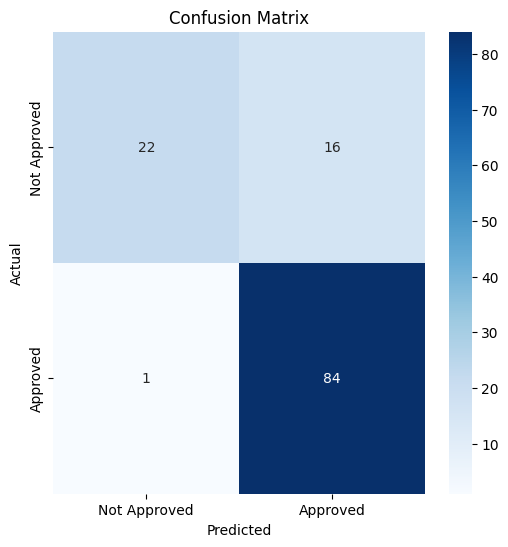


Sample Input:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
150             6277                0.0       118.0             360.0   

     Credit_History  Gender_Male  Gender_Unknown  Married_Unknown  \
150             0.0         True           False            False   

     Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
150        False         False         False          False   

     Dependents_Unknown  Education_Not Graduate  Self_Employed_Unknown  \
150               False                   False                  False   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
150              False                    False                False  


Predicted Loan Status: Not Approved
Probability of Approval: 0.09


In [ ]:
# Part 3: Logistic Regression Model to Predict Loan_Status

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loan_data = pd.read_csv('/content/loan.csv')

# process
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})  # encode Loan_Status as 1/0
loan_data = loan_data.drop(columns=['Loan_ID'])  # Drop Loan_ID

loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode categorical variables
loan_data = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents',
                                               'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Features and target
X = loan_data.drop(columns=['Loan_Status'])
y = loan_data['Loan_Status']

# train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# show confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Example prediction for a new applicant
sample_input = X_test.iloc[0:1]  # Select a sample input from the test set
predicted_status = model.predict(sample_input)
predicted_probability = model.predict_proba(sample_input)[:, 1]  # Probability of approval

print(f"\nSample Input:\n{sample_input}")
print(f"\n\nPredicted Loan Status: {'Approved' if predicted_status[0] == 1 else 'Not Approved'}")
print(f"Probability of Approval: {predicted_probability[0]:.2f}")


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.04      0.08        23
         1.0       0.82      0.99      0.89        98

    accuracy                           0.81       121
   macro avg       0.66      0.52      0.49       121
weighted avg       0.76      0.81      0.74       121



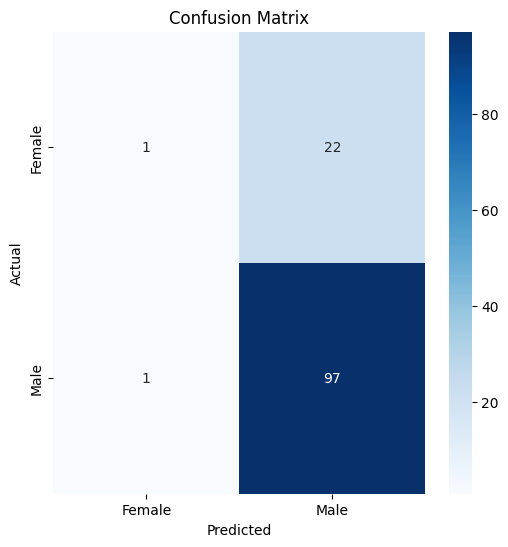


Sample Input:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
281             3927              800.0       112.0             360.0   

     Credit_History  Married_Unknown  Married_Yes  Dependents_1  Dependents_2  \
281             1.0            False         True         False         False   

     Dependents_3+  Dependents_Unknown  Education_Not Graduate  \
281          False               False                   False   

     Self_Employed_Unknown  Self_Employed_Yes  Property_Area_Semiurban  \
281                  False              False                     True   

     Property_Area_Urban  
281                False  
Predicted Gender: Male
Probability of Being Male: 0.88


In [ ]:
# Part 3: Logistic Regression Model to Predict Applicant Gender
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


loan_data = pd.read_csv('/content/loan.csv')


loan_data['Gender'] = loan_data['Gender'].map({'Male': 1, 'Female': 0})  # Encode Gender as 1 (Male) and 0 (Female)
loan_data = loan_data.dropna(subset=['Gender'])  # Drop rows with missing Gender

# Drop columns irrelevant for predicting gender
loan_data = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop olan_ID and Loan_Status

loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode categorical variables
loan_data = pd.get_dummies(loan_data, columns=['Married', 'Dependents', 'Education',
                                               'Self_Employed', 'Property_Area'], drop_first=True)

# Features and target
X = loan_data.drop(columns=['Gender'])
y = loan_data['Gender']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Example prediction for a new data point
sample_input = X_test.iloc[0:1]  # Select a sample input from the test set
predicted_gender = model.predict(sample_input)
predicted_probability = model.predict_proba(sample_input)[:, 1]  # probability of being Male

print(f"\nSample Input:\n{sample_input}")
print(f"Predicted Gender: {'Male' if predicted_gender[0] == 1 else 'Female'}")
print(f"Probability of Being Male: {predicted_probability[0]:.2f}")



Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       0.83      0.95      0.89        85

    accuracy                           0.83       123
   macro avg       0.83      0.75      0.78       123
weighted avg       0.83      0.83      0.82       123



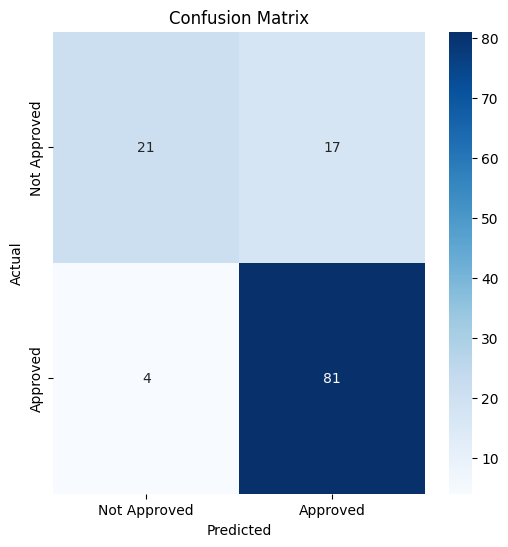

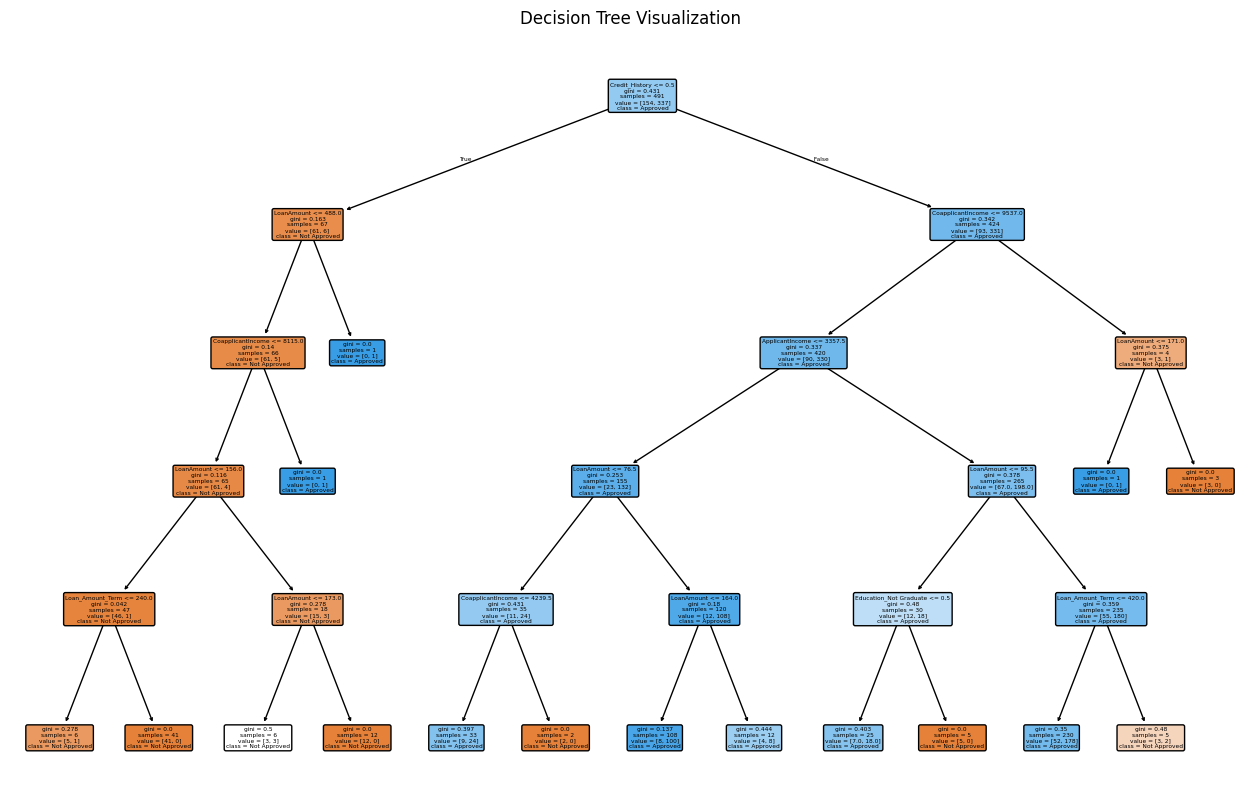


Sample Input:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
150             6277                0.0       118.0             360.0   

     Credit_History  Gender_Male  Gender_Unknown  Married_Unknown  \
150             0.0         True           False            False   

     Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
150        False         False         False          False   

     Dependents_Unknown  Education_Not Graduate  Self_Employed_Unknown  \
150               False                   False                  False   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
150              False                    False                False  
Predicted Loan Status: Not Approved


In [ ]:
# Part 4: Decision Tree to predict loan_status

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loan_data = pd.read_csv('/content/loan.csv')
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})  # Encode Loan_Status as 1/0
loan_data = loan_data.drop(columns=['Loan_ID'])  # Drop Loan_ID as it's not predictive

# missing values
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode categorical variables
loan_data = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents',
                                               'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Features and target
X = loan_data.drop(columns=['Loan_Status'])
y = loan_data['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# cnfusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Example prediction for a new applicant
sample_input = X_test.iloc[0:1]  # Select a sample input from the test set
predicted_status = dt_model.predict(sample_input)

print(f"\nSample Input:\n{sample_input}")
print(f"Predicted Loan Status: {'Approved' if predicted_status[0] == 1 else 'Not Approved'}")


Mean Squared Error: 5642.12
R-squared Score: -0.04


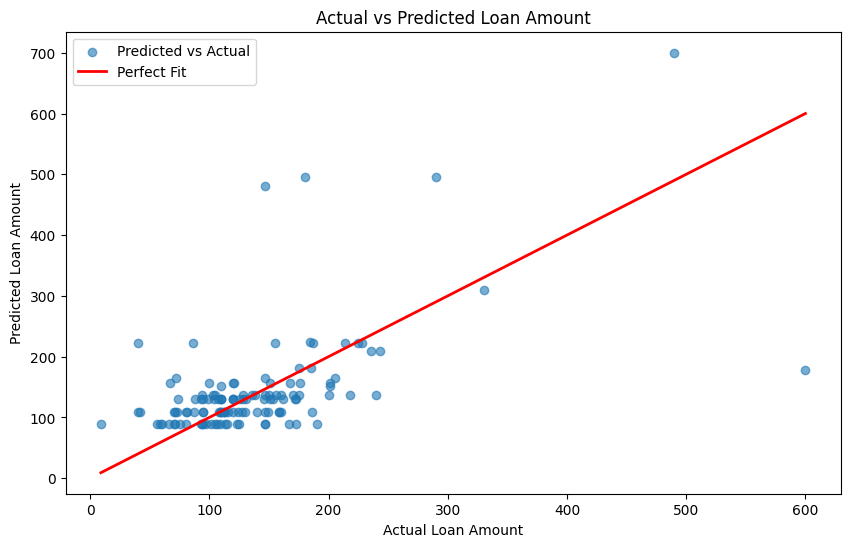

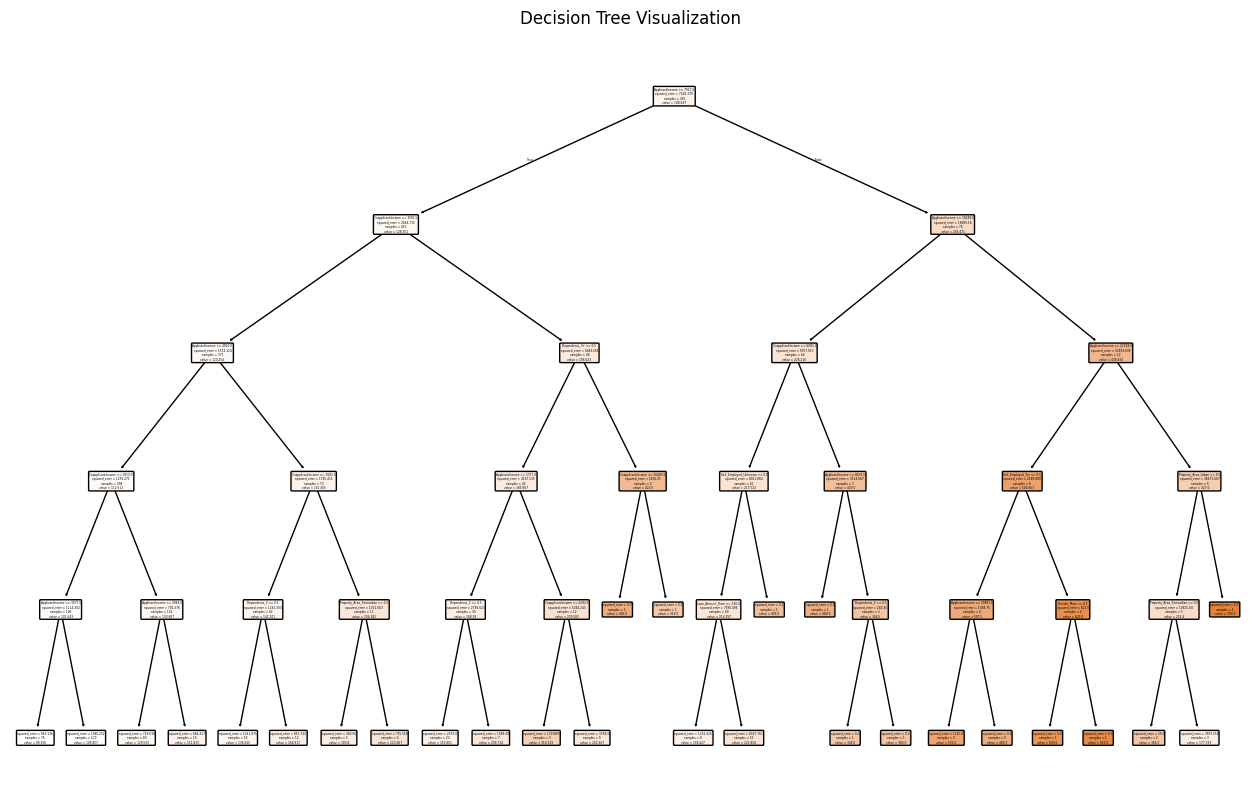


Sample Input:
     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
350             9083                0.0             360.0             1.0   

     Gender_Male  Gender_Unknown  Married_Unknown  Married_Yes  Dependents_1  \
350         True           False            False         True         False   

     Dependents_2  Dependents_3+  Dependents_Unknown  Education_Not Graduate  \
350         False          False               False                   False   

     Self_Employed_Unknown  Self_Employed_Yes  Property_Area_Semiurban  \
350                  False              False                     True   

     Property_Area_Urban  
350                False  
Predicted Loan Amount: 222.85


In [ ]:
# Part 4: Decision Tree to predict loan_amount

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


loan_data = pd.read_csv('/content/loan.csv')


loan_data = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])  # irrelevant columns


loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode
loan_data = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents',
                                               'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Features and target
X = loan_data.drop(columns=['LoanAmount'])
y = loan_data['LoanAmount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Perfect Fit")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.legend()
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Example prediction for a new data point
sample_input = X_test.iloc[0:1]  # Select a sample input from the test set
predicted_loan_amount = dt_model.predict(sample_input)

print(f"\nSample Input:\n{sample_input}")
print(f"Predicted Loan Amount: {predicted_loan_amount[0]:.2f}")


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



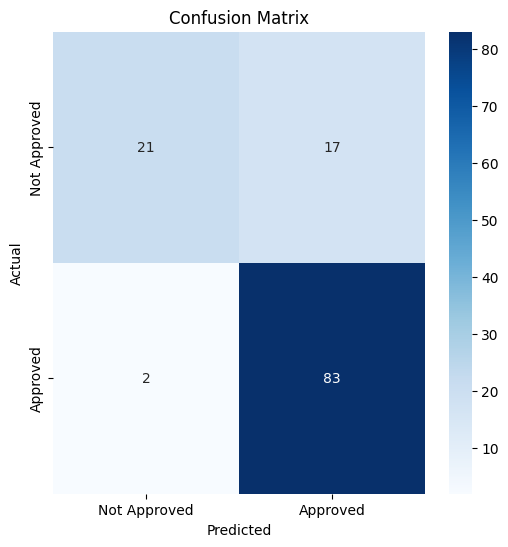

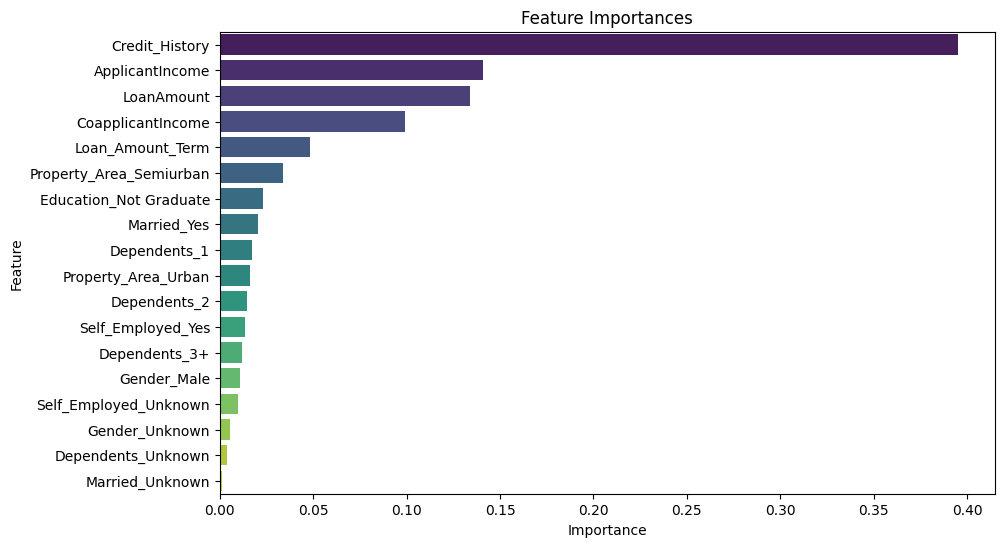


Sample Input:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
150             6277                0.0       118.0             360.0   

     Credit_History  Gender_Male  Gender_Unknown  Married_Unknown  \
150             0.0         True           False            False   

     Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
150        False         False         False          False   

     Dependents_Unknown  Education_Not Graduate  Self_Employed_Unknown  \
150               False                   False                  False   

     Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
150              False                    False                False  
Predicted Loan Status: Not Approved
Probability of Approval: 0.11


In [ ]:
# Part 5: Random Forest  to predict loan_status

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loan_data = pd.read_csv('/content/loan.csv')

loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})  # encode Loan_Status as 1/0
loan_data = loan_data.drop(columns=['Loan_ID'])  # Drop loan_ID as it's not predictive

loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode
loan_data = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents',
                                               'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Features and target
X = loan_data.drop(columns=['Loan_Status'])
y = loan_data['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Example prediction for a new applicant
sample_input = X_test.iloc[0:1]  # Select a sample input from the test set
predicted_status = rf_model.predict(sample_input)
predicted_probability = rf_model.predict_proba(sample_input)[:, 1]  # Probability of approval

print(f"\nSample Input:\n{sample_input}")
print(f"Predicted Loan Status: {'Approved' if predicted_status[0] == 1 else 'Not Approved'}")
print(f"Probability of Approval: {predicted_probability[0]:.2f}")


Mean Squared Error: 3637.62
R-squared Score: 0.33


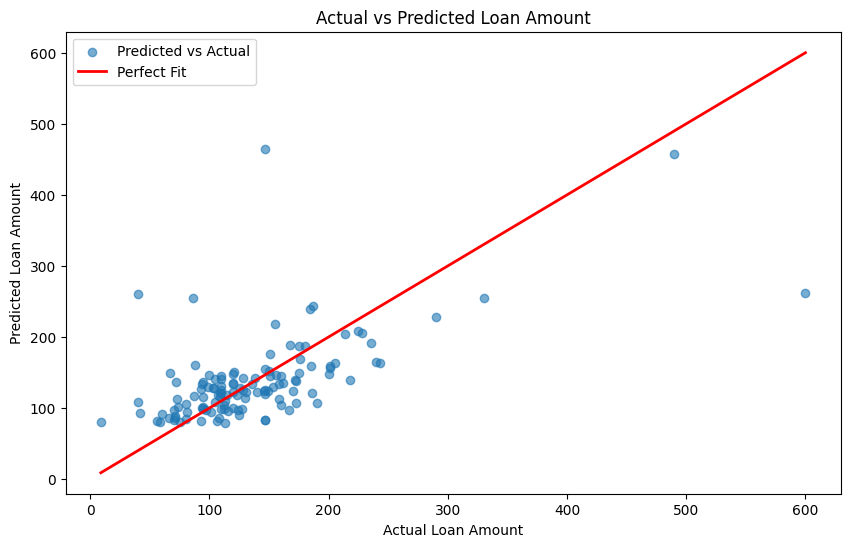

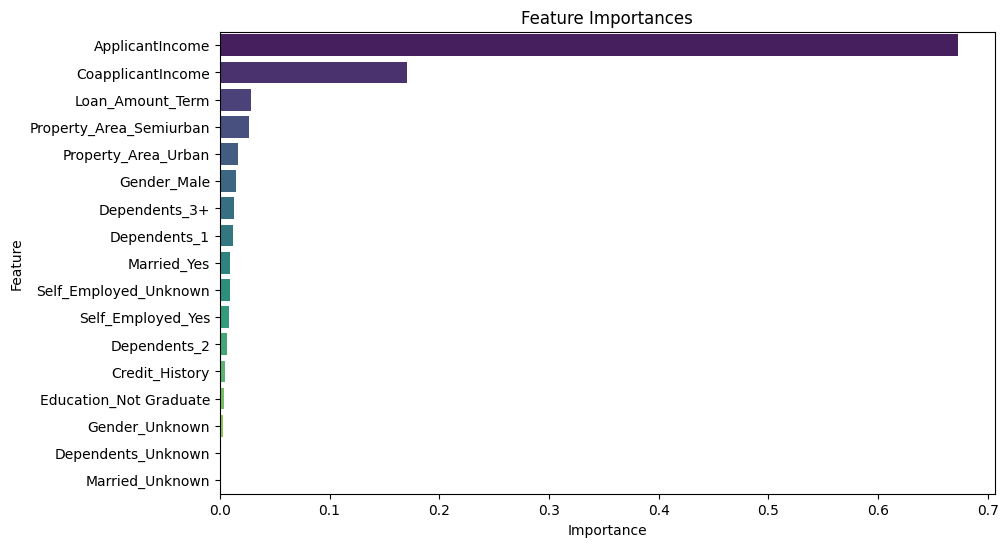


Sample Input:
     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
350             9083                0.0             360.0             1.0   

     Gender_Male  Gender_Unknown  Married_Unknown  Married_Yes  Dependents_1  \
350         True           False            False         True         False   

     Dependents_2  Dependents_3+  Dependents_Unknown  Education_Not Graduate  \
350         False          False               False                   False   

     Self_Employed_Unknown  Self_Employed_Yes  Property_Area_Semiurban  \
350                  False              False                     True   

     Property_Area_Urban  
350                False  
Predicted Loan Amount: 206.04


In [ ]:
# Part 5: Random Forest to predict loan_amount

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

loan_data = pd.read_csv('/content/loan.csv')

loan_data = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop irrelevant columns

loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data.fillna('Unknown', inplace=True)

# encode
loan_data = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents',
                                               'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Features and target
X = loan_data.drop(columns=['LoanAmount'])
y = loan_data['LoanAmount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Perfect Fit")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Example prediction for a new data point
sample_input = X_test.iloc[0:1]  # Select a sample input from the test set
predicted_loan_amount = rf_model.predict(sample_input)

print(f"\nSample Input:\n{sample_input}")
print(f"Predicted Loan Amount: {predicted_loan_amount[0]:.2f}")


